# CH06_1_Implementing Total Sample at once by vectorizing neural network algorithm

- Last update : 20220330

## Implementing batch Gradient descent in Singlelayer class 

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
x = cancer.data 
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                           test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, 
                                                  stratify= y_train_all, test_size=0.2, random_state=42)

# Verification of trainning set size and verification set size 

print(x_train.shape, y_val.shape)

In [21]:
# 6. Implementing Batch Gradient Descent in forpass(), backprop() method

def forpass(self, x):
    z = np.dot(x, self.w) + self.b        # Calculating linear output 
    return z 

def backprop(self, x, err):
    m = len(x)
    w_grad = np.dot(x.T, err) / m         # Calculating average Gradient on weight 
    b_grad = np.sum(err) / m              # Calculating average Gradient on interscept 
    return w_grad, b_grad 

In [ ]:
# 7. Modifying fit() method 

def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)                              # Change the target as column vector 
    y_val = y_val.reshape(-1, 1)                      # Change the verification target as column vector
    m = len(x)                                        # Save the no. of sample 
    self.w = np.ones((x.shape[1], 1))                 # Initialize the weight  
    self.b = 0                                        # Initialize the interscept 
    self.w_history.append(self.w.copy())              # Record the weight 
    
    # repeat routine epochs times 
    for i in range(epochs): 
        z = self.forpass(x)                            # Implement Forward propagation Calculation 
        a = self.activation(z)                         # Apply activation function 
        err = -(y - a)                                 # Calculate error 
        
        # Calculating Gradient by error backpropagation 
        w_grad, b_grad = self.backprop(x, err)
        
        # Add differentiation of pannelty in Gradient 
        w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w)/ m 
        
        # updating weight and interscept 
        self.w -= self.lr * w_grad 
        self.b -= self.lr * b_grad 
        
        # recording weight 
        self.w_history.append(self.w.copy())
        
        # Clipping for safe log calculation 
        a = np.clip(a, 1e-10, 1-1e-10)
        
        # merging log loss with Regularization loss and adding it to the list
        loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
        self.losses.append((loss + self.reg_loss()) /m )
        
        # calculating loss on verification set 
        self.update_val_loss(x_val, y_val)

In [ ]:
# 8. Modifying other methods 

def predict(self, x): 
    z = self.forpass(x)                 # Implement forward propagation Calculation 
    return z > 0                        # Apply Step function 

def update_val_loss(self, x_val, y_val): 
    z = self.forpass(x_val)             # Implement forward propagation Calculation 
    a = self.activation(z)              # Implenent activation function 
    a = np.clip(a, 1e-10, 1-1e-10)      # Clipping output 
    
    # merging log loss with Regularization loss and adding it to the list
    val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [45]:
class SingleLayer:
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None                   # weight  
        self.b = None                   # interscept 
        self.losses = []                # trainning loss 
        self.val_losses = []            # verification loss 
        self.w_history = []             # weight records 
        self.lr = learning_rate         # learning rate  
        self.l1 = l1                    # L1 loss hyperparameter 
        self.l2 = l2                    # L2 loss hyperparameter 
        
    def forpass(self, x): 
        z = np.dot(x, self.w) + self.b      # linear output calculation 
        return z 
    
    def backprop(self, x, err): 
        m = len(x)
        w_grad = np.dot(x.T, err) / m       # Gradient Calculation on weight 
        b_grad = np.sum(err)/ m             # Gradient Calculation on intercept
        return w_grad, b_grad 
    
    def activation(self, z): 
        a = 1/(1 + np.exp(-z))              # Sigmoid calculation 
        return a 
    
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                              # Change the target as column vector 
        y_val = y_val.reshape(-1, 1)                      # Change the verification target as column vector
        m = len(x)                                        # Save the no. of sample 
        self.w = np.ones((x.shape[1], 1))                 # Initialize the weight  
        self.b = 0                                        # Initialize the interscept 
        self.w_history.append(self.w.copy())              # Record the weight 

        # repeat routine epochs times 
        for i in range(epochs): 
            z = self.forpass(x)                            # Implement Forward propagation Calculation 
            a = self.activation(z)                         # Apply activation function 
            err = -(y - a)                                 # Calculate error 

            # Calculating Gradient by error backpropagation 
            w_grad, b_grad = self.backprop(x, err)

            # Add differentiation of pannelty in Gradient 
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w)/ m 

            # updating weight and interscept 
            self.w -= self.lr * w_grad 
            self.b -= self.lr * b_grad 

            # recording weight 
            self.w_history.append(self.w.copy())

            # Clipping for safe log calculation 
            a = np.clip(a, 1e-10, 1-1e-10)

            # adding log loss and rule loss and adding it to the list
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m )

            # calculating loss on verification set 
            self.update_val_loss(x_val, y_val)
            
    def predict(self, x): 
        z = self.forpass(x)                 # Implement forward propagation Calculation 
        return z > 0                        # Apply Step function 

    def score(self, x, y): 
        # return True ratio by comparing prediction and Target column vector 
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def reg_loss(self): 
        # Apply Regularization on weight 
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

    def update_val_loss(self, x_val, y_val): 
        z = self.forpass(x_val)             # Implement forward propagation Calculation 
        a = self.activation(z)              # Implenent activation function 
        a = np.clip(a, 1e-10, 1-1e-10)      # Clipping output 

        # merging log loss with Regularization loss and adding it to the list
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

## 9. Preprocessing trainning data standardization 

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

## 10. batch Gradient descent application by transferring the data to SingleLayer class object 

In [47]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=10000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

## 11. Observing efficiency using verification set and comparing with graph 

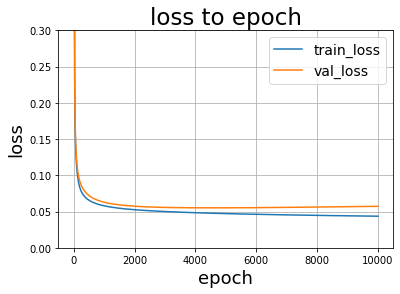

In [54]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)

plt.ylabel('loss', fontsize = 18)
plt.xlabel('epoch', fontsize = 18)
plt.title('loss to epoch', fontsize = 23)
plt.legend(['train_loss', 'val_loss'], fontsize = 14)

plt.grid()
plt.show()

## 12. Obsersing the weight value changes to understand the result 

<function matplotlib.pyplot.show(*args, **kw)>

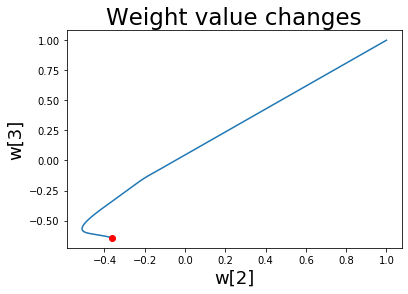

In [57]:
w2 = []
w3 = []

for w in single_layer.w_history: 
    w2.append(w[2])
    w3.append(w[3])
    
plt.plot(w2, w3)    
plt.plot(w2[-1], w3[-1], 'ro')

plt.title('Weight value changes', fontsize =23)
plt.xlabel('w[2]', fontsize =18)
plt.ylabel('w[3]', fontsize =18)    

plt.show 